In [1]:
import covid19_data as covid19 # Data from Johns Hopkins University Center
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np

In [2]:
br = covid19.jsonByName("Brazil")

In [3]:
print(br)

{'Confirmed': 4041638, 'Deaths': 124614, 'Recovered': 3429435, 'Active': 487589}


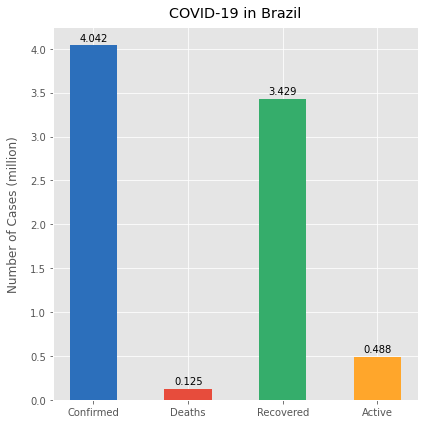

In [4]:
plt.style.use('ggplot') # ggplot theme
fig, ax = plt.subplots(figsize=(6, 6))

width = 0.5  #width of the bars
x_pos = np.arange(len(br)) # the label locations
x = br.values()
color = ['#2c6fbb','#e74c3c','#35ad6b','#ffa62b']

#Add some text for labels, title and custom x-axis tick labels, etc.
ax.bar(x_pos, x, width, align='center', color = color)
ax.set_xticks(x_pos)
ax.set_xticklabels(br.keys()) # x label
ax.set_ylabel('Number of Cases (million)',labelpad=10) # y label
ax.set_title('COVID-19 in Brazil', pad=10) # title

# convert the numbers in million notation
formatter = ticker.FuncFormatter(lambda x,z: x/10**6) 
ax.yaxis.set_major_formatter(formatter)

# display the values at the top of each bar
for i, v in enumerate(x): 
    plt.text(i- 0.15, v+(10**4.7), str(round(v/10**6,3)))

fig.tight_layout()
plt.show()

In [5]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

df = pd.read_csv(url)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805


In [6]:
BR = df.loc[df['Country/Region'] == 'Brazil']

In [7]:
BR

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20
30,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,3669995,3717156,3761391,3804803,3846153,3862311,3908272,3950931,3997865,4041638


In [8]:
br_cases = BR.iloc[0,4:]
dates = pd.to_datetime(br_cases.index)

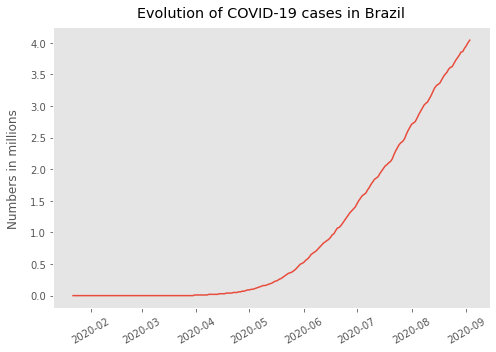

In [9]:
plt.style.use('ggplot') # ggplot theme
plt.subplots(figsize=(7, 5)) # graph size
plt.plot(dates, list(map(lambda x:(round(x/10**6,2)),br_cases)), color="#e74c3c")

#Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Numbers in millions',labelpad=10)
plt.title('Evolution of COVID-19 cases in Brazil', pad=10)
plt.xticks(rotation=30)

plt.tight_layout()
plt.grid()
plt.show()